In [1]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC



# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
bipolarsentiment = pd.read_csv("bismillah.csv")

In [3]:
bipolarsentiment

,Unnamed: 0,tweet_preprocessing,sentimen
0,1,kak maaf kendalanya ya kak bella bantu kendala...,negatif
1,2,follow yuk byk hadiah guys,positif
2,3,kak maaf kendalanya ya kak bella bantu kendala...,negatif
3,4,mengajakmu bergabung bukalapak memberikanmu cr...,positif
4,5,tolong nomor dana hangus memutus akun dana,negatif
...,...,...,...
817,818,kirain rui mau pake embel2 bukalapak juga kek ...,netral
818,819,mau checkout marketplace tapi punyanya dana at...,positif
819,820,baik kak mohon maaf atas kendalanya ya kak aka...,negatif
820,821,males sama bukalapak dan kayaknya semua seller...,negatif


In [4]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(bipolarsentiment['tweet_preprocessing'], bipolarsentiment['sentimen'], test_size = 0.4, random_state = 42)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [5]:
df_train90 = pd.DataFrame()
df_train90['tweet_preprocessing'] = train_X
df_train90['sentimen'] = train_Y

df_test10 = pd.DataFrame()
df_test10['tweet_preprocessing'] = test_X
df_test10['sentimen'] = test_Y

In [6]:
df_train90

,tweet_preprocessing,sentimen
682,halo min dpt sms notifikasi ganti no telf akun...,positif
177,pembeli gk dihubungi aja transaksi laporkan vi...,negatif
567,hai kak senang hati bella bantu,negatif
680,cek perlengkapan butuhkan harganya terbaik,negatif
257,reksa dana ud konsultasi ahlinya telegram dise...,positif
...,...,...
71,bukalapak ovo skil academy tolong pusing,negatif
106,proses komplain transaksi bl2015ipkbmcinv,negatif
270,kubah masjid enamel stainless harga murah dipesan,positif
435,buka bukalapak edisi malam jumatan jamin ori,positif


In [7]:
df_test10

,tweet_preprocessing,sentimen
610,rt perusahaan teknologi indonesia bukalapak me...,positif
174,kak maaf banget ya udah bikin kakak gak nyaman...,negatif
67,yuk langsung aja kepoin marketplace gopayless ...,positif
168,jual bukalapak carousel deh cepet lakunya,positif
275,gratisan pake kode ongkirgratis pas belanja bu...,positif
...,...,...
493,mohon maaf ya kak terkait mohon kese,netral
629,salah kode unik udh nungfu 3 disuruh nungfu br...,positif
425,hai kak maaf banget ya kendalanya terkait kend...,negatif
178,tersedia jg bukalapak shopee toped wa 08591916...,positif


In [9]:
df_train90.to_csv("df_train90.csv")
df_test10.to_csv("df_test10.csv")

In [10]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(bipolarsentiment['tweet_preprocessing'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['tweet_preprocessing'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['tweet_preprocessing'])

In [11]:
tfidf_vect_9010

TfidfVectorizer(max_features=5000)

In [12]:
print(train_X_tfidf_9010)

  (0, 1467)	0.14446056457306494
  (0, 1338)	0.3376182928281366
  (0, 1277)	0.2875534787871719
  (0, 966)	0.3376182928281366
  (0, 961)	0.2521729223945112
  (0, 899)	0.2122182609302159
  (0, 524)	0.2815414376911193
  (0, 483)	0.3115440400642885
  (0, 433)	0.2521729223945112
  (0, 417)	0.3376182928281366
  (0, 329)	0.27129853249540364
  (0, 226)	0.25546718492727116
  (0, 77)	0.2589888124384207
  (1, 1446)	0.4260935876598797
  (1, 1404)	0.27587660891438187
  (1, 1040)	0.4026040762536399
  (1, 769)	0.4260935876598797
  (1, 495)	0.36497611449661455
  (1, 371)	0.44167149401690464
  (1, 69)	0.2653474906004366
  (2, 1229)	0.5584336783940017
  (2, 637)	0.25034720961052787
  (2, 537)	0.5276485770966431
  (2, 520)	0.32808022717423047
  (2, 172)	0.31962864719853107
  :	:
  (489, 1116)	0.4486637689071867
  (489, 726)	0.5397087305809788
  (489, 228)	0.620732508079199
  (490, 1285)	0.3968748163498089
  (490, 922)	0.3533933300677208
  (490, 835)	0.3968748163498089
  (490, 739)	0.3968748163498089
  (49

In [13]:
print(test_X_tfidf_9010)

  (0, 1335)	0.329874946323455
  (0, 1170)	0.26554482708325966
  (0, 1113)	0.28239028040194214
  (0, 1076)	0.2971061972953279
  (0, 872)	0.329874946323455
  (0, 810)	0.3376939835747668
  (0, 573)	0.3168085976108198
  (0, 414)	0.329874946323455
  (0, 303)	0.3229780666813811
  (0, 259)	0.10946489875582051
  (0, 104)	0.3229780666813811
  (1, 1467)	0.1873100864741054
  (1, 1420)	0.25853297767103167
  (1, 1261)	0.3358094092809014
  (1, 975)	0.27516589682243714
  (1, 801)	0.1987778503859909
  (1, 705)	0.403953433640495
  (1, 638)	0.511309943989026
  (1, 637)	0.18109333093112334
  (1, 477)	0.2542615794406339
  (1, 217)	0.2899343630563701
  (1, 139)	0.25289691868737474
  (2, 1481)	0.23210890107366314
  (2, 1390)	0.2880760855213738
  (2, 1366)	0.3312787797693405
  :	:
  (325, 396)	0.29830126862267436
  (325, 245)	0.32318851705422813
  (326, 1481)	0.2629524766406076
  (326, 1467)	0.19983932368480845
  (326, 1357)	0.32964162168762307
  (326, 801)	0.2120741703365133
  (326, 687)	0.2896480109072706


In [14]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(493, 1485)
(329, 1485)


In [15]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'kak': 637, 'maaf': 801, 'kendalanya': 687, 'ya': 1467, 'bella': 172, 'bantu': 143, 'kendala': 685, 'kakak': 638, 'inbox': 572, 'silakan': 1261, 'follow': 461, 'yuk': 1481, 'byk': 273, 'hadiah': 517, 'guys': 510, 'mengajakmu': 868, 'bergabung': 184, 'bukalapak': 259, 'memberikanmu': 852, 'credits': 309, 'rp10': 1165, '000': 1, 'cek': 287, 'tolong': 1392, 'nomor': 964, 'dana': 326, 'hangus': 527, 'memutus': 858, 'akun': 77, 'belanja': 167, 'pengiriman': 1054, 'pakai': 1012, 'jasa': 609, 'terimakasih': 1354, 'jnt': 618, 'malam': 818, 'min': 899, 'knp': 722, 'ga': 466, 'login': 788, 'padhal': 1007, 'udah': 1420, 'bener': 175, 'sms': 1277, 'kode': 723, 'gagal': 474, 'balas': 133, 'dmnya': 405, 'yaa': 1468, 'hi': 545, 'gratisan': 505, 'pake': 1013, 'ongkirgratis': 990, 'pas': 1022, 'biar': 214, 'ongkir': 989, 'gratis': 504, 'maks': 816, 'rp30rb': 1168, 'berlaku': 197, 'kejadian': 669, 'shopee': 1252, 'balikin': 136, 'akunku': 78, 'hallo': 523, 'membeli': 851, 'pelatihan': 1037, 'prakerja':

In [16]:
# Proses Pelatihan

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)

SVC(kernel='linear')

In [17]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Sentiment'] = test_X
test_prediction_9010['Label'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [18]:
test_prediction_9010

,Sentiment,Label
610,rt perusahaan teknologi indonesia bukalapak me...,positif
174,kak maaf banget ya udah bikin kakak gak nyaman...,negatif
67,yuk langsung aja kepoin marketplace gopayless ...,positif
168,jual bukalapak carousel deh cepet lakunya,positif
275,gratisan pake kode ongkirgratis pas belanja bu...,positif
...,...,...
493,mohon maaf ya kak terkait mohon kese,negatif
629,salah kode unik udh nungfu 3 disuruh nungfu br...,negatif
425,hai kak maaf banget ya kendalanya terkait kend...,negatif
178,tersedia jg bukalapak shopee toped wa 08591916...,positif


In [19]:

test_prediction_9010.to_csv("test_prediction_9010.csv")

In [20]:
SVM_accuracy_9010

76.3

In [21]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_9010))


Here is the classification report:
              precision    recall  f1-score   support

     negatif       0.78      0.81      0.79       141
      netral       0.67      0.14      0.23        29
     positif       0.75      0.84      0.79       159

    accuracy                           0.76       329
   macro avg       0.73      0.59      0.60       329
weighted avg       0.76      0.76      0.74       329



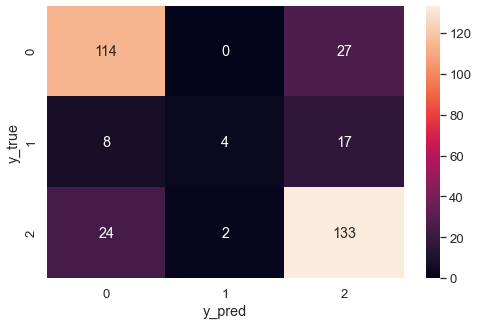

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(test_Y, predictions_SVM_9010), annot=True, fmt=".0f", ax=ax)
plt.ylabel("y_true")
plt.xlabel("y_pred")
plt.show()